# PROJECT 5: HOUSES PRICES PREDICTION IN BCN EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

#import statsmodels.api as sm

In [2]:
df_prop = pd.read_csv(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\csv\prop_prices.csv')
df_val  = pd.read_excel(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\xls\m2_x_año_3.xlsx')

In [3]:
df_val.distrito = df_val.distrito.apply(lambda x: x.strip(),)

In [4]:
df_val.columns

Index(['distrito', 'valor_m2', 'año'], dtype='object')

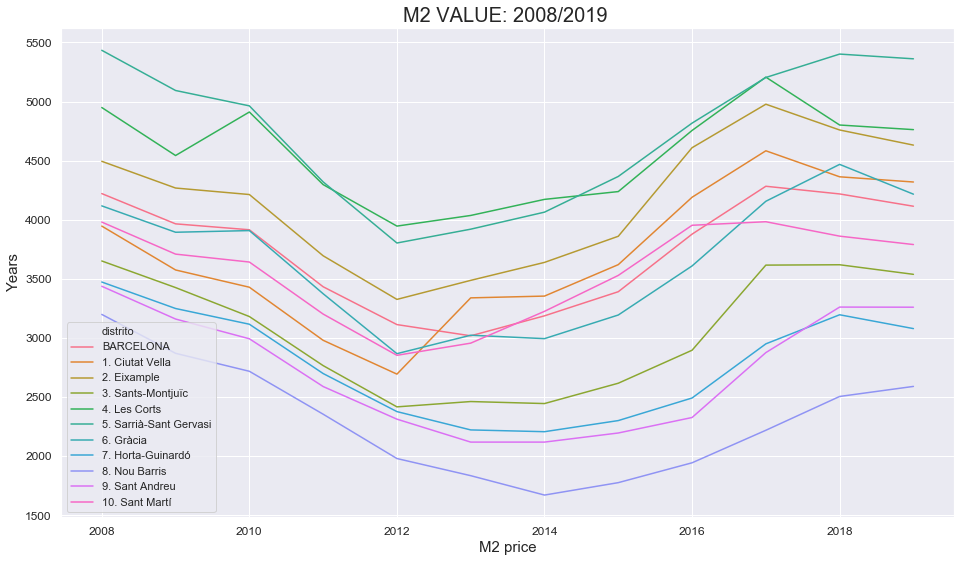

In [5]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(16,9))
ax = sns.lineplot(x='año', y='valor_m2', hue='distrito', data=df_val)

ax.set_title("M2 VALUE: 2008/2019 ",fontsize=20)
ax.set_xlabel("M2 price",fontsize=15)
ax.set_ylabel("Years",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('m2 value.png', dpi=400)

In [6]:
df_prop.head()

,Unnamed: 0,district,room_n,bath_n,renovated,sqm_constr,price
0,0,Ciutat Vella,2.0,2.0,0,61.0,440000.0
1,1,Ciutat Vella,3.0,2.0,1,134.0,880000.0
2,2,Ciutat Vella,2.0,2.0,1,129.0,840000.0
3,3,Ciutat Vella,2.0,2.0,1,93.0,720000.0
4,4,Ciutat Vella,1.0,2.0,1,65.0,400000.0


In [7]:
df_prop.isna().sum()

Unnamed: 0    0
district      0
room_n        0
bath_n        0
renovated     0
sqm_constr    0
price         0
dtype: int64

In [8]:
df_prop.district.value_counts()

Eixample               732
Sarria-Sant_Gervasi    440
Ciutat Vella           357
Sant Marti             146
Gràcia                 107
Sants Montjuic         104
Horta Guinardó          54
Les Corts               51
none                     7
Name: district, dtype: int64

In [9]:
df_prop.describe()

,Unnamed: 0,room_n,bath_n,renovated,sqm_constr,price
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1.998000e+03
mean,406.422923,3.203704,2.667167,0.136136,160.239693,1.052471e+06
std,284.657219,1.514426,11.646557,0.343019,124.861083,1.021309e+06
min,0.000000,1.000000,1.000000,0.000000,1.170000,6.000000e+04
25%,176.000000,2.000000,2.000000,0.000000,85.000000,4.500000e+05
50%,357.000000,3.000000,2.000000,0.000000,123.000000,7.180000e+05
75%,580.750000,4.000000,3.000000,0.000000,188.000000,1.269000e+06
max,1090.000000,11.000000,520.000000,1.000000,995.000000,1.000000e+07


In [10]:
df_prop.loc[df_prop['sqm_constr']==1.248, 'sqm_constr']=1248
df_prop.loc[df_prop['sqm_constr']==1.244, 'sqm_constr']=1244
df_prop.loc[df_prop['sqm_constr']==1.170, 'sqm_constr']=1170

In [11]:
df_prop.loc[df_prop['bath_n']==520, 'bath_n']=5

In [12]:
df_prop['sqm_price']=round(df_prop.price/df_prop.sqm_constr,2)

In [13]:
#df_prop.to_csv('house_prices.csv')

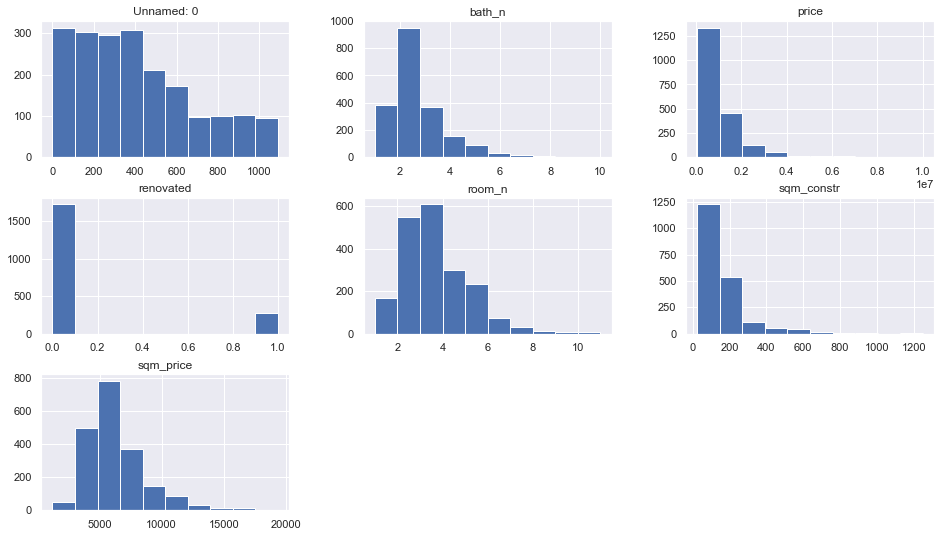

In [14]:
df_prop.hist(figsize=(16,9))
ax.figure.savefig('m2 value.png', dpi=400)

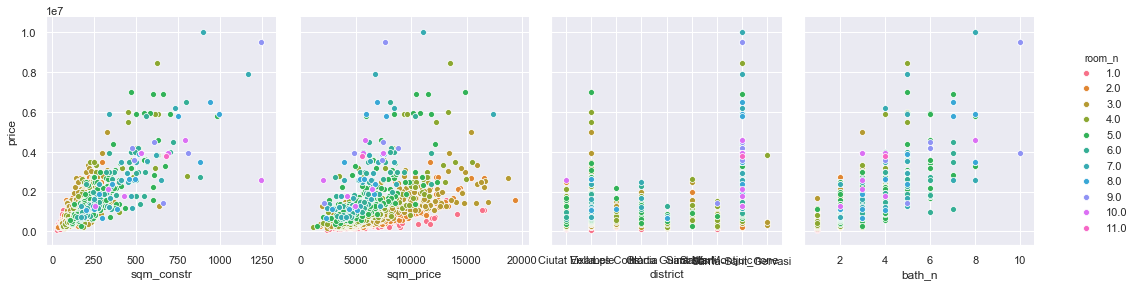

In [15]:
g = sns.pairplot(df_prop, x_vars=["sqm_constr", "sqm_price", "district", "bath_n"],  y_vars=["price"],hue = "room_n")
g.fig.set_size_inches(16,4)
#g.set_title("Houses by nº of rooms ",fontsize=20)
g.fig.savefig('n_room_houses_2.png', dpi=400)

c:\program files\python38\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

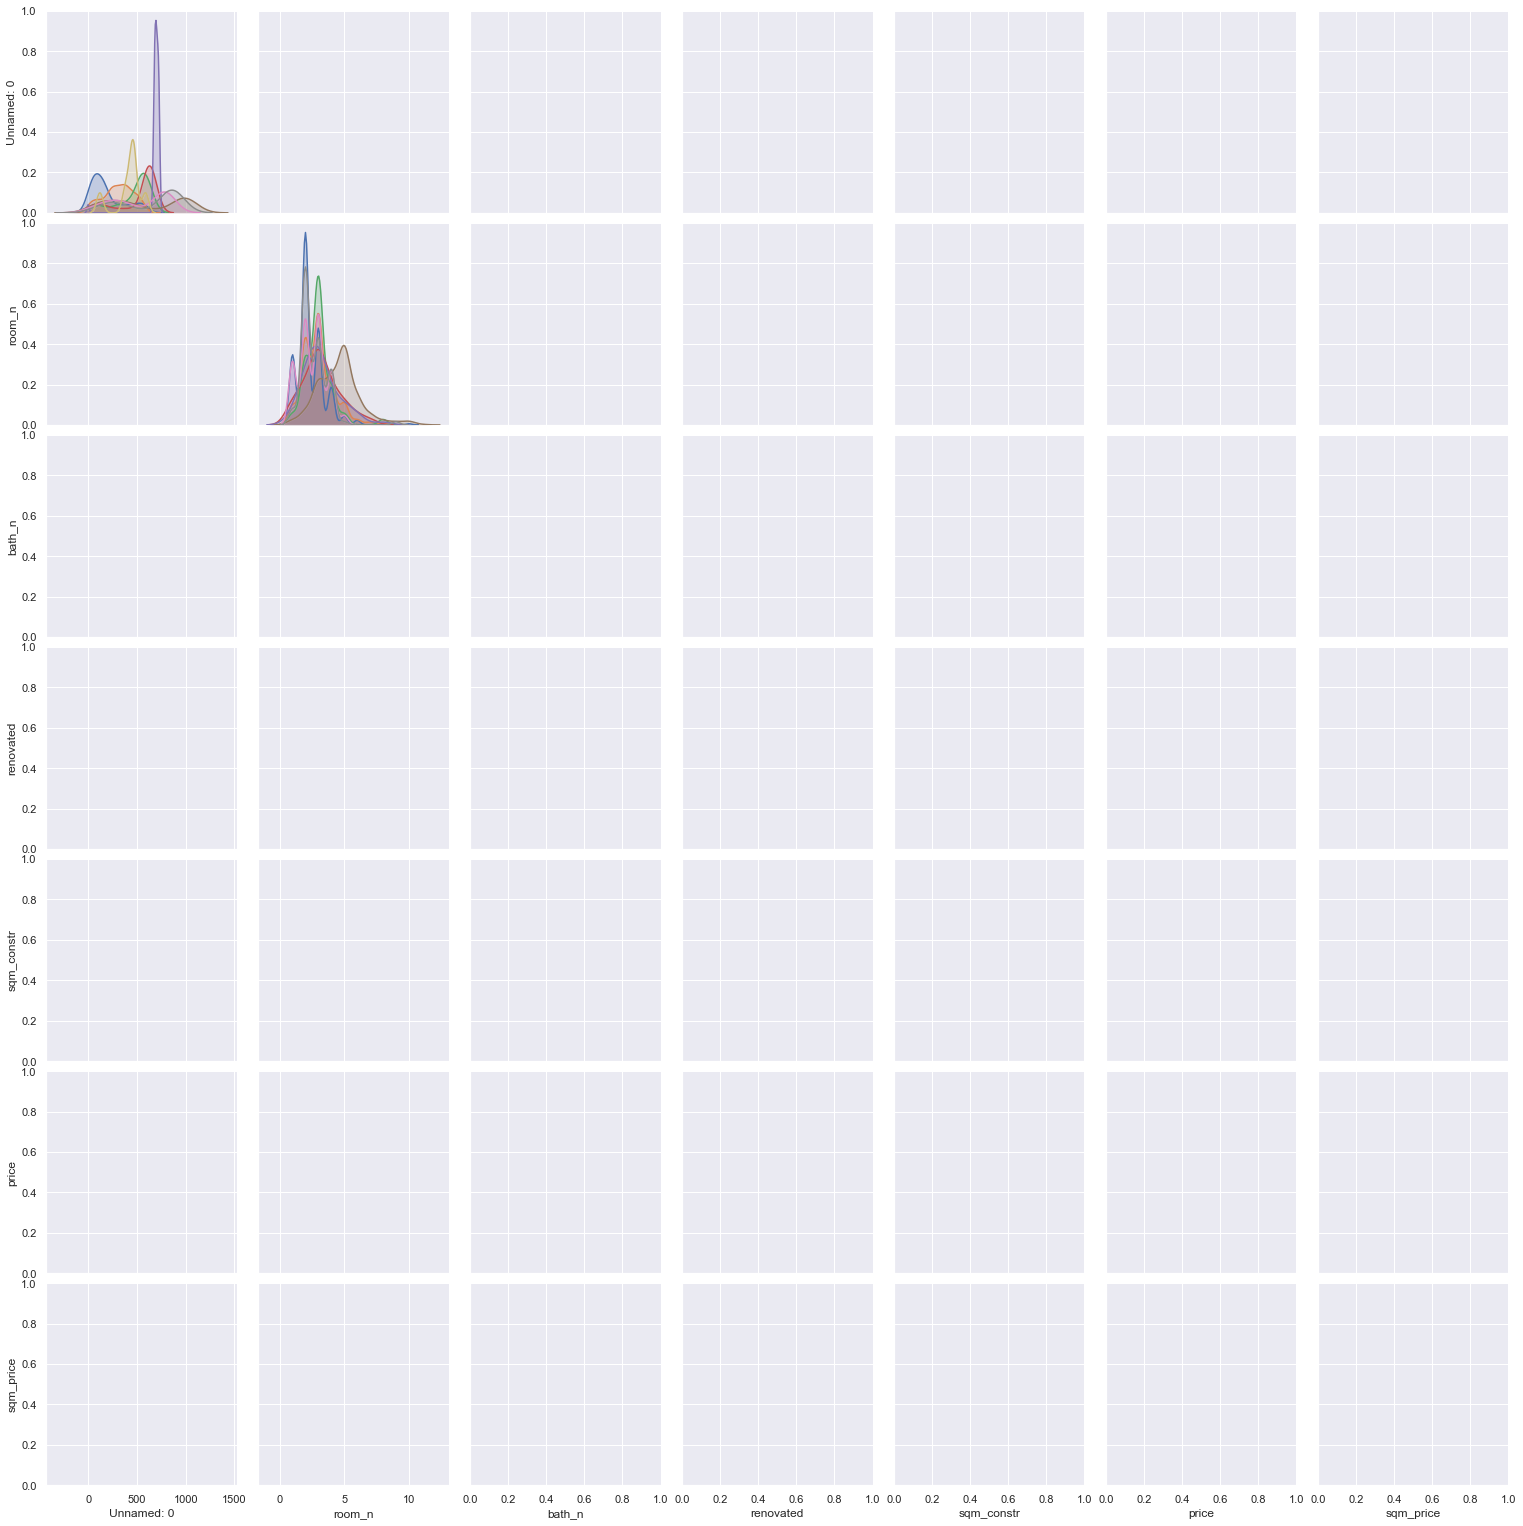

In [16]:
sns.pairplot(df_prop, hue = "district", size=3)


# 1.LISTINGS NUMBER 

## 1.1LISTINGS NUMBER BY DISTRICT

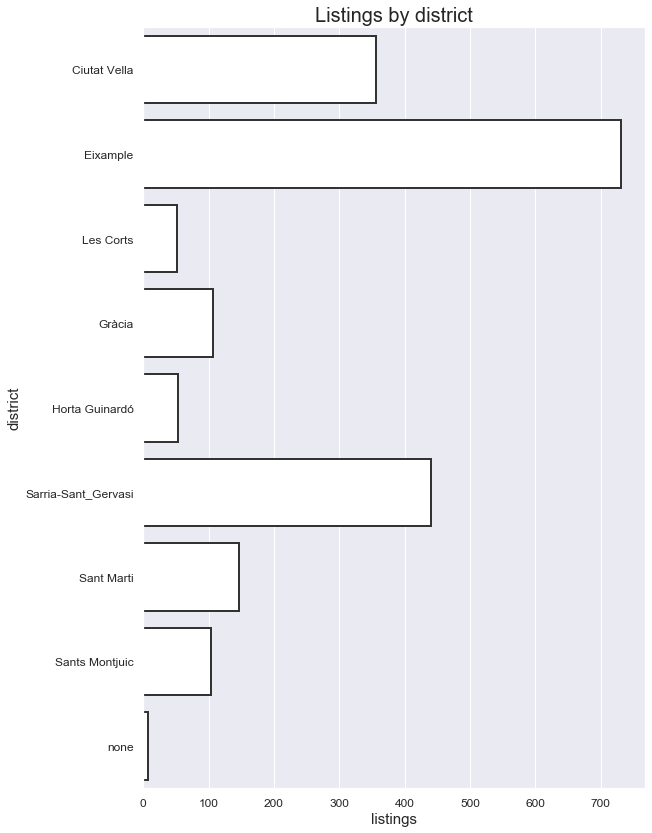

In [17]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(9,14))
ax = sns.countplot(y="district",linewidth=2,color='white', edgecolor=".2", data=df_prop)

ax.axes.set_title("Listings by district",fontsize=20)
ax.set_xlabel("listings",fontsize=15)
ax.set_ylabel("district",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('number_of_listings.png', dpi=400)



ax = sns.FacetGrid(df_prop, row="district", col="room_n", margin_titles=True)
bins = np.linspace(0, 60, 13)
ax.map(plt.hist, "price", color="steelblue", bins=bins)

## 1.2 Outliers remove: IQR Score

In [18]:
import numpy as np
import scipy.stats


In [19]:
rank = ['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó']

def remove_outlier(df_in, cat_col_name, col_name):
    
    for i in rank:
        distr_val = df_in.loc[df_in[cat_col_name]==i][col_name]
        q1 = distr_val.quantile(0.02)
        q3 = distr_val.quantile(0.98)
        iqr = q3-q1 #Interquartile range
        #fence_low  = q1-1.5*iqr
        #fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col_name] > q1-1.5*iqr) & (df_in[col_name] < q3+1.5*iqr)]
        
    return df_out

In [20]:
df_prop_clean = remove_outlier(df_prop, 'district','price')
df_prop_clean.district.value_counts(),df_prop.district.value_counts()

(Eixample               649
 Ciutat Vella           351
 Sarria-Sant_Gervasi    285
 Sant Marti             142
 Sants Montjuic         104
 Gràcia                 104
 Horta Guinardó          54
 Les Corts               50
 none                     6
 Name: district, dtype: int64,
 Eixample               732
 Sarria-Sant_Gervasi    440
 Ciutat Vella           357
 Sant Marti             146
 Gràcia                 107
 Sants Montjuic         104
 Horta Guinardó          54
 Les Corts               51
 none                     7
 Name: district, dtype: int64)

In [21]:
df_prop_clean.to_csv('prop_clean.csv')

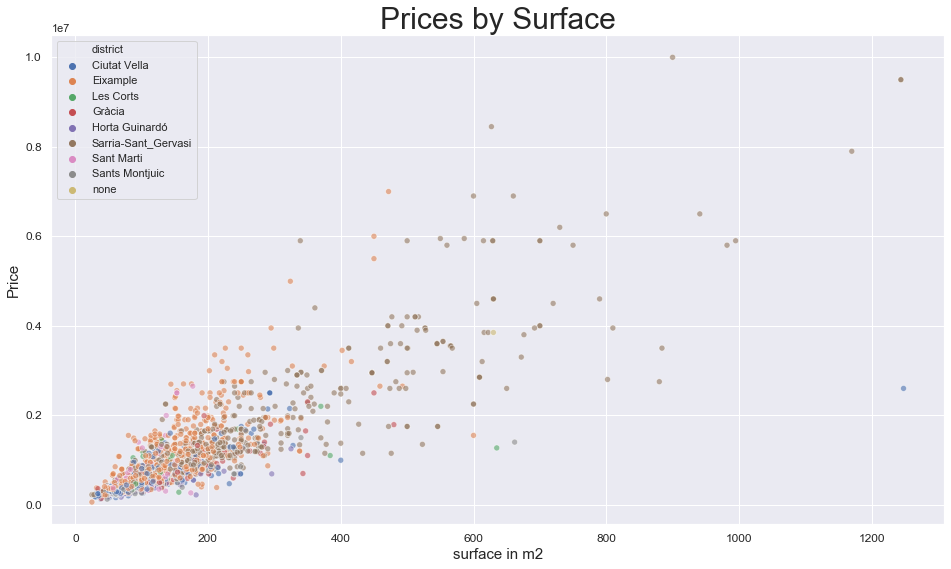

In [22]:
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(df_prop.sqm_constr, df_prop.price,hue='district', alpha=0.6, data=df_prop)

ax.axes.set_title("Prices by Surface",fontsize=30)
ax.set_xlabel("surface in m2",fontsize=15)
ax.set_ylabel("Price",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('Prices_by_surface.png', dpi=400)

In [23]:
def plot_scatter_chart(df, location):
    rooms_2 = df[(df.district==location) & (df.room_n==2)]
    rooms_3 = df[(df.district==location) & (df.room_n==3)]
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax = sns.scatterplot(rooms_2.sqm_constr, rooms_2.price, alpha=0.7, data=rooms_2, legend ='full')
    ax = sns.scatterplot(rooms_3.sqm_constr, rooms_3.price, marker='+', alpha=0.7, data=rooms_3, legend ='full')
    
    ax.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=30)
    ax.set_xlabel("surface",fontsize=15)
    ax.set_ylabel("SQM Price",fontsize=15)
    ax.tick_params(labelsize=12)
    ax.figure.savefig(f"SQM Prices by Surface and rooms in {i}", dpi=400)

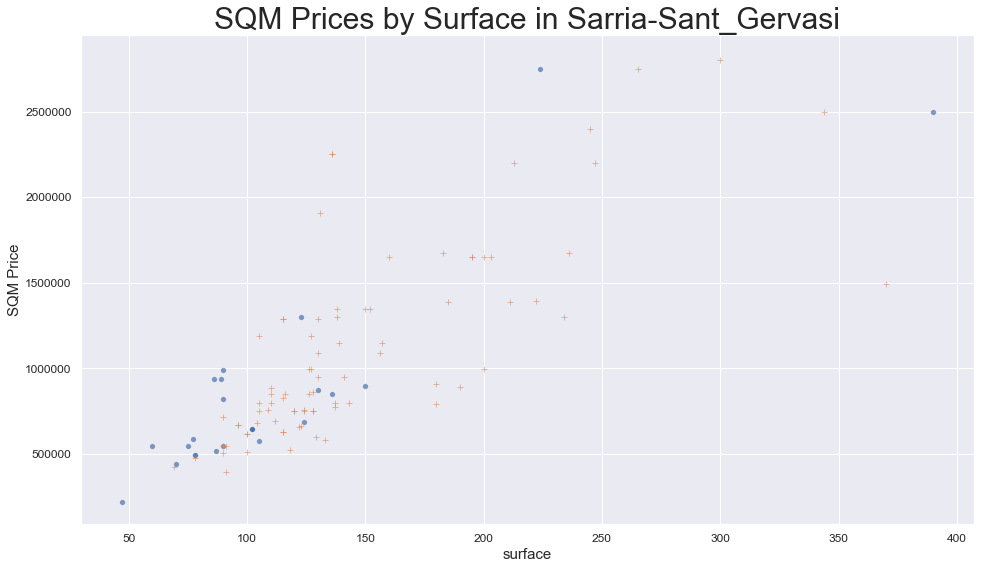

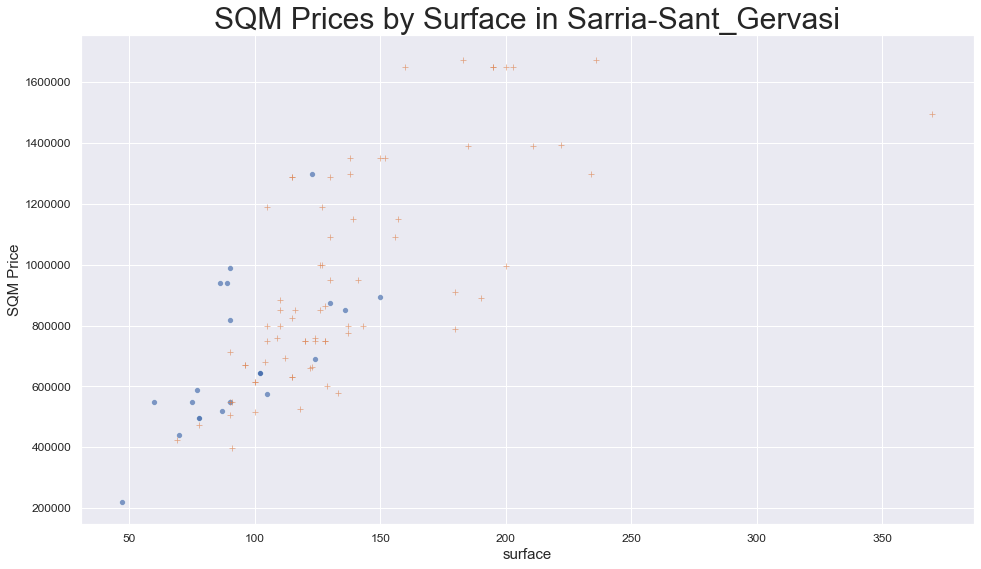

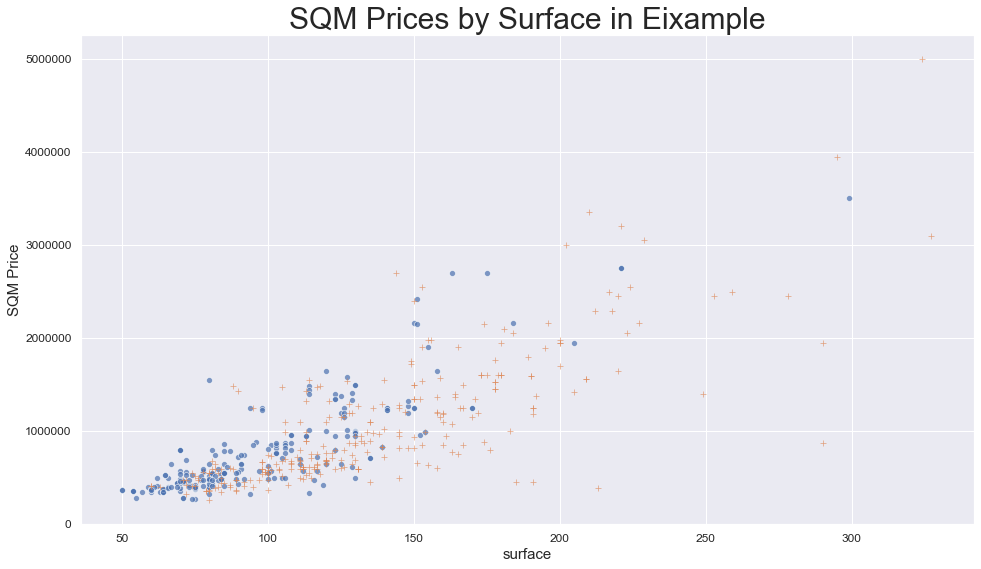

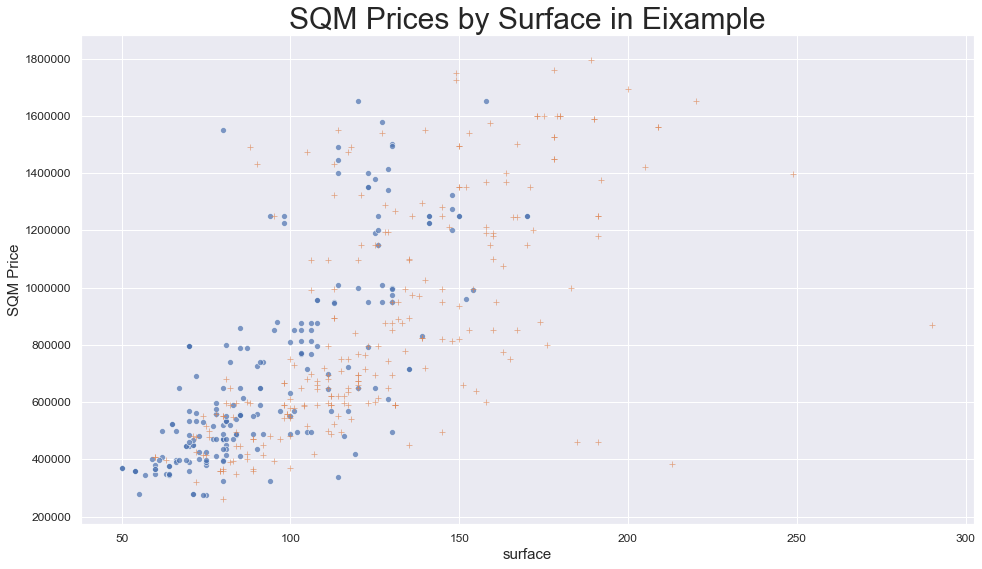

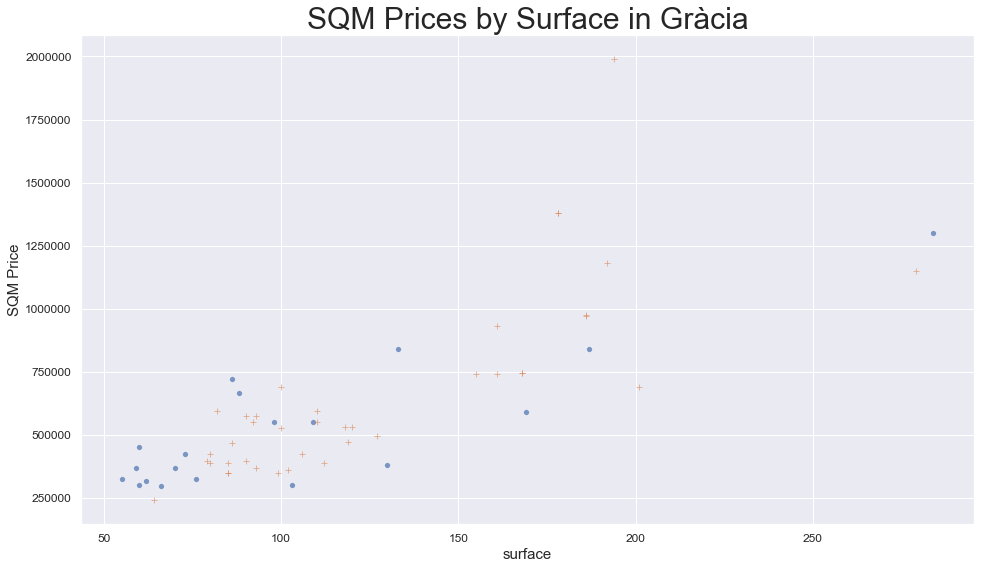

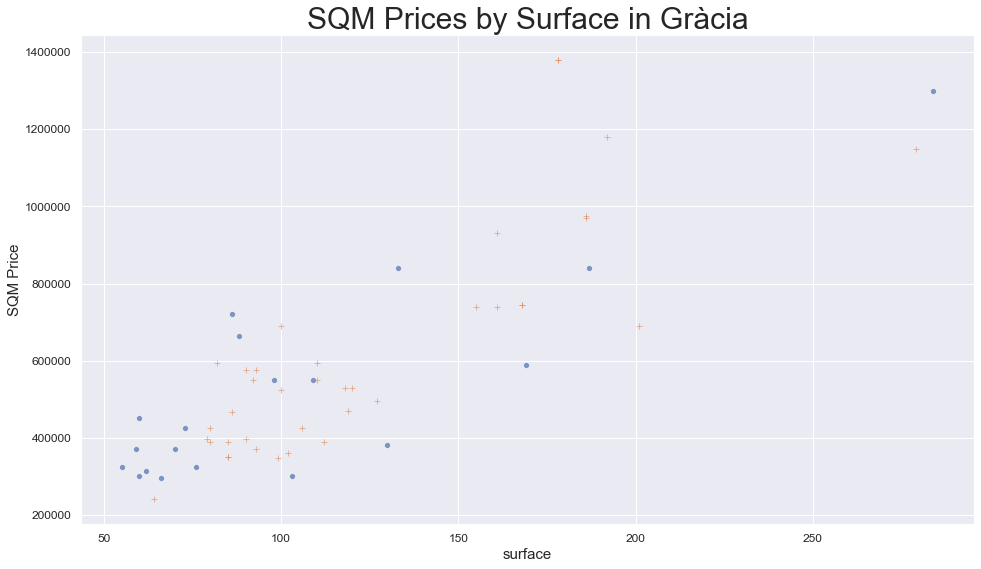

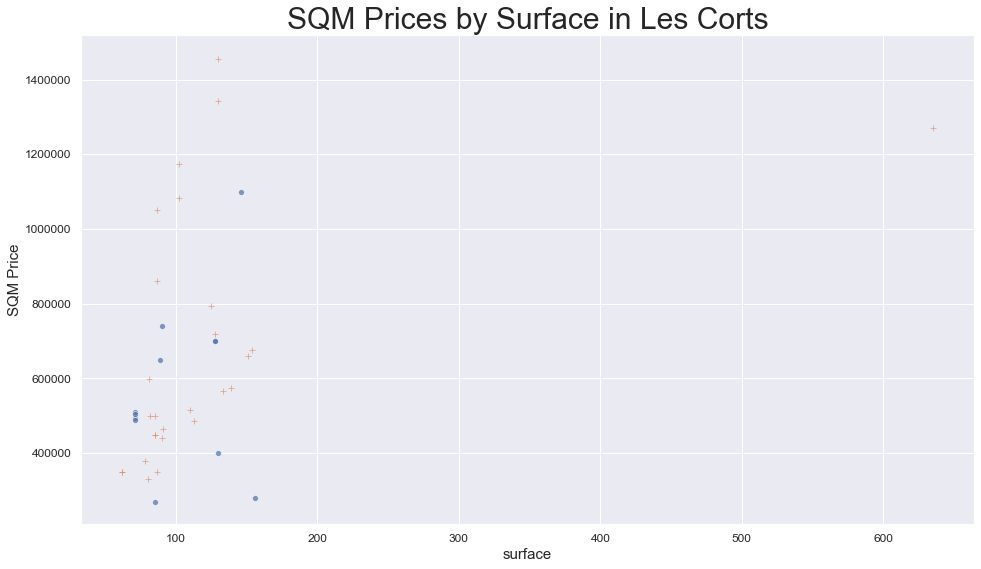

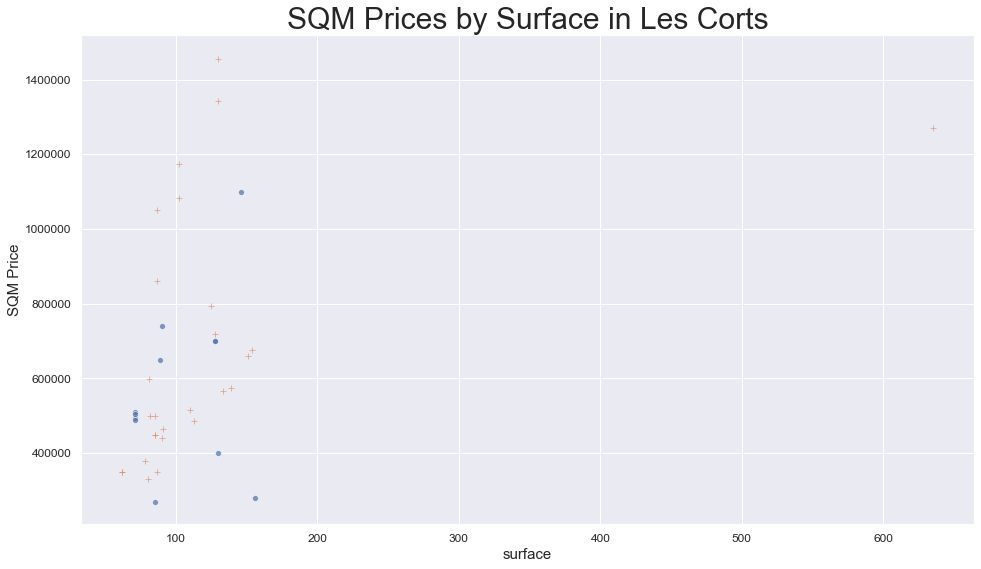

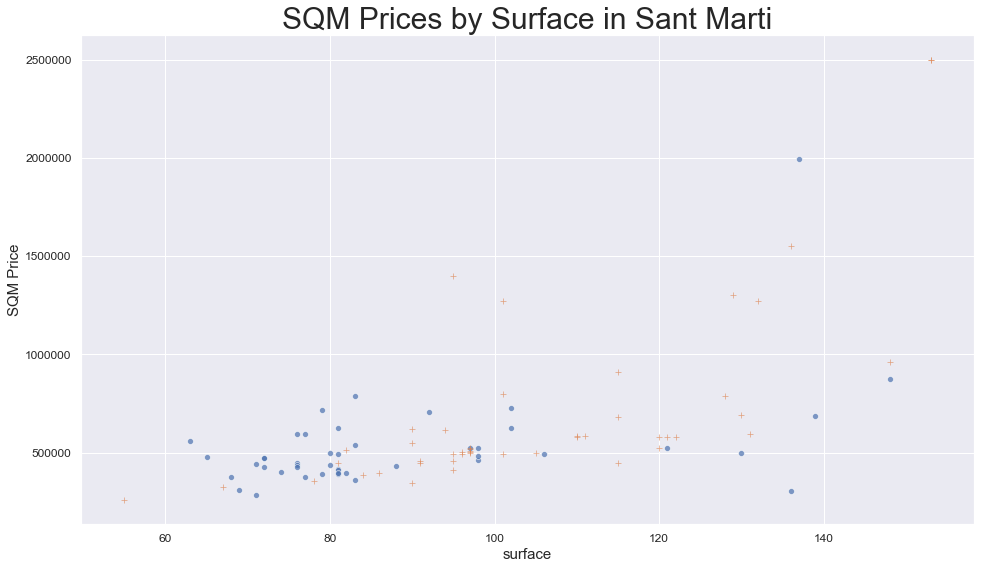

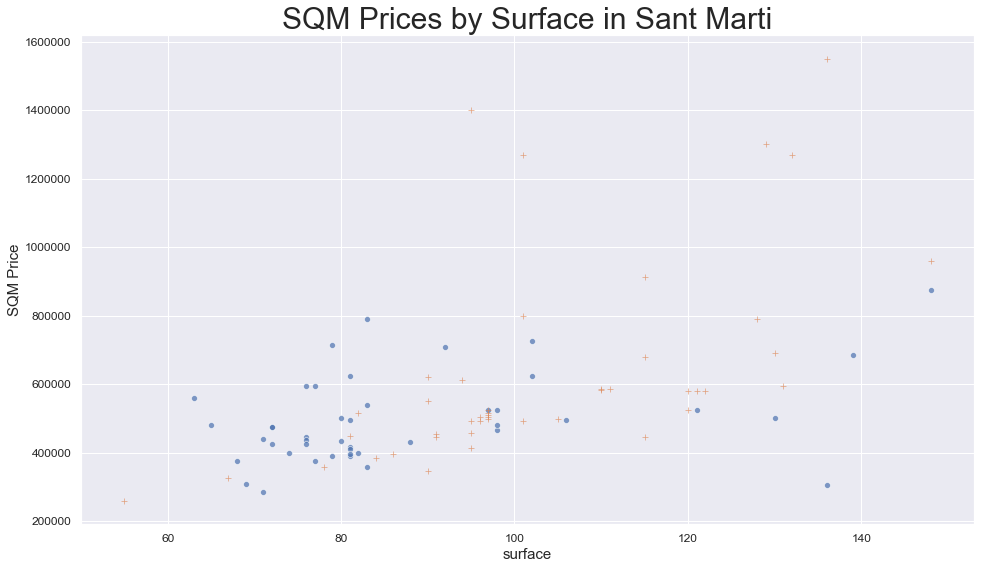

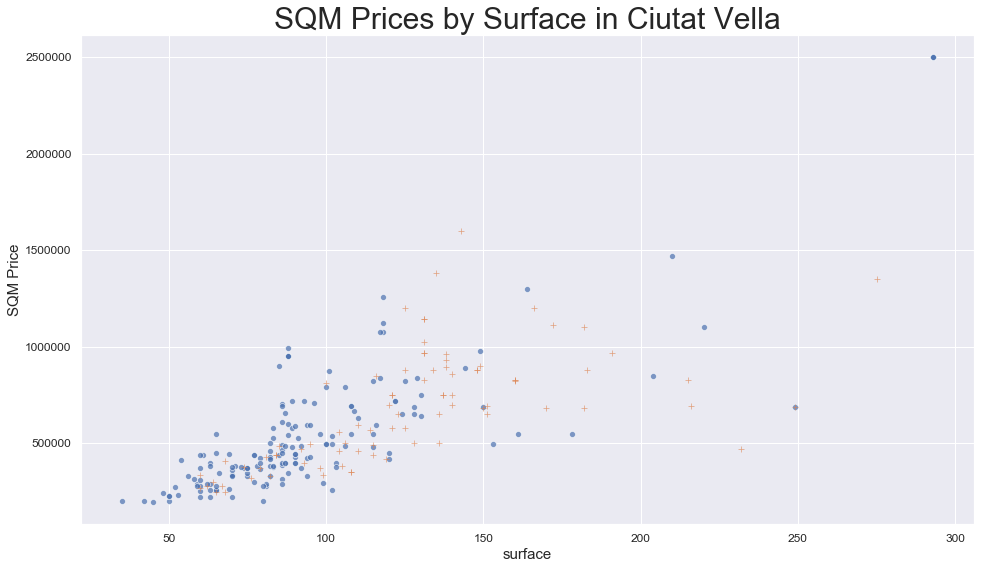

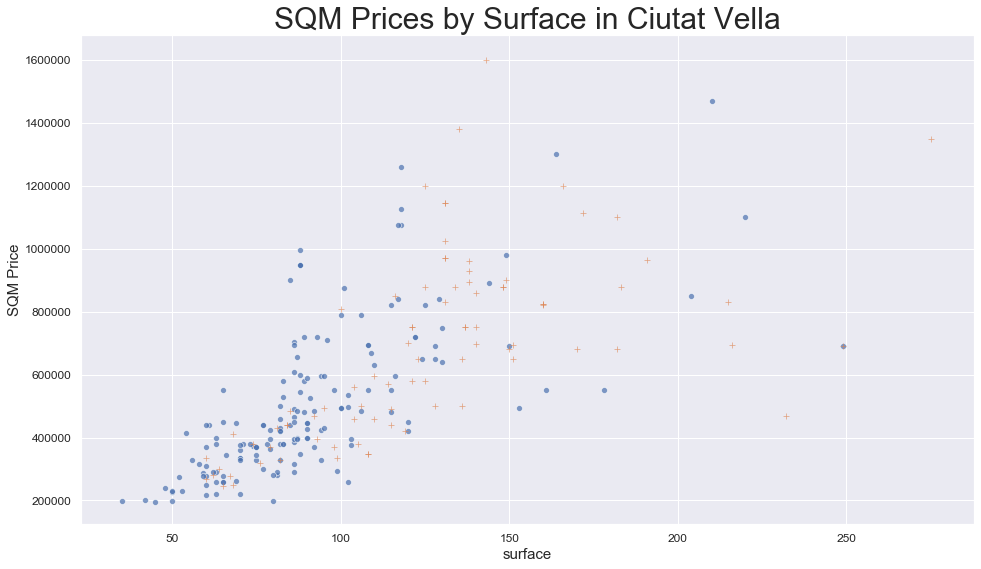

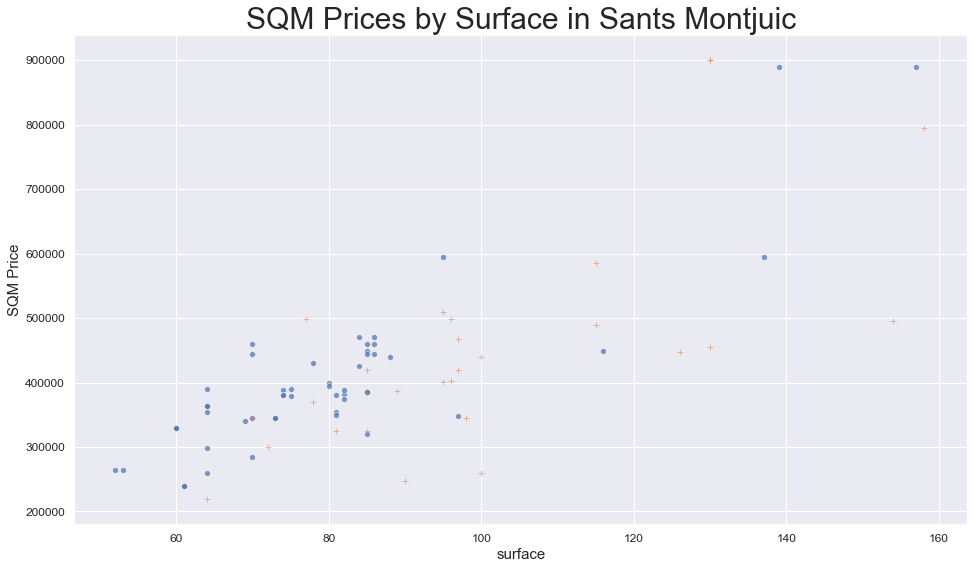

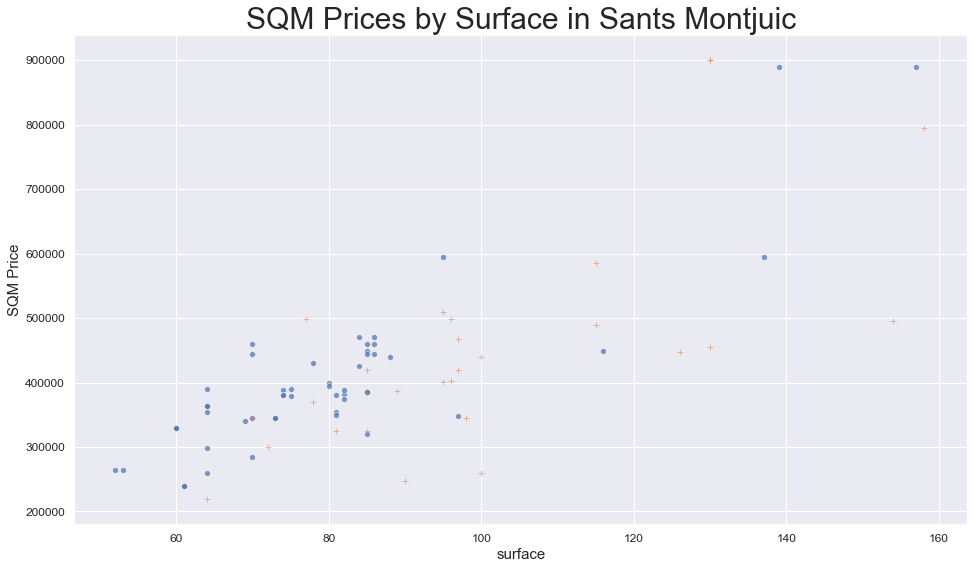

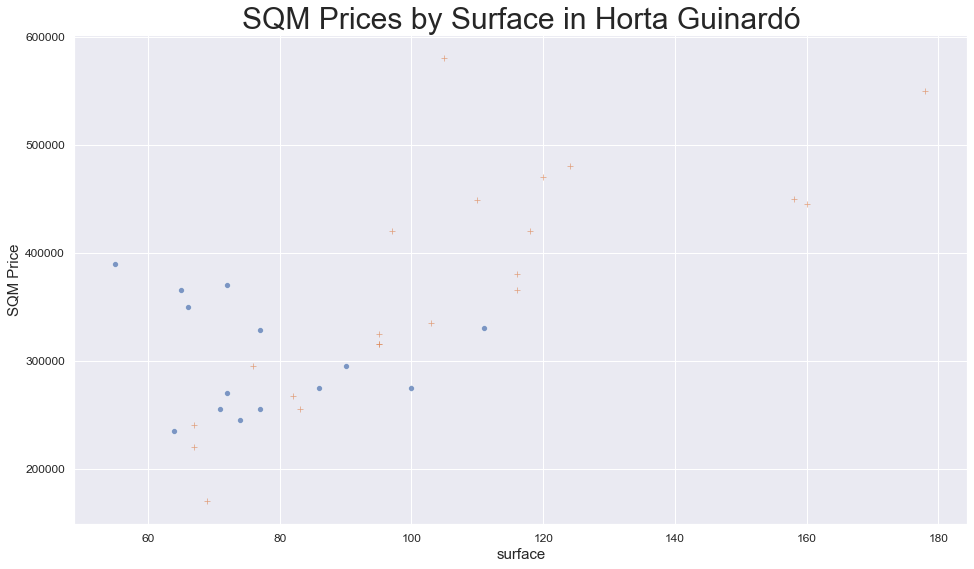

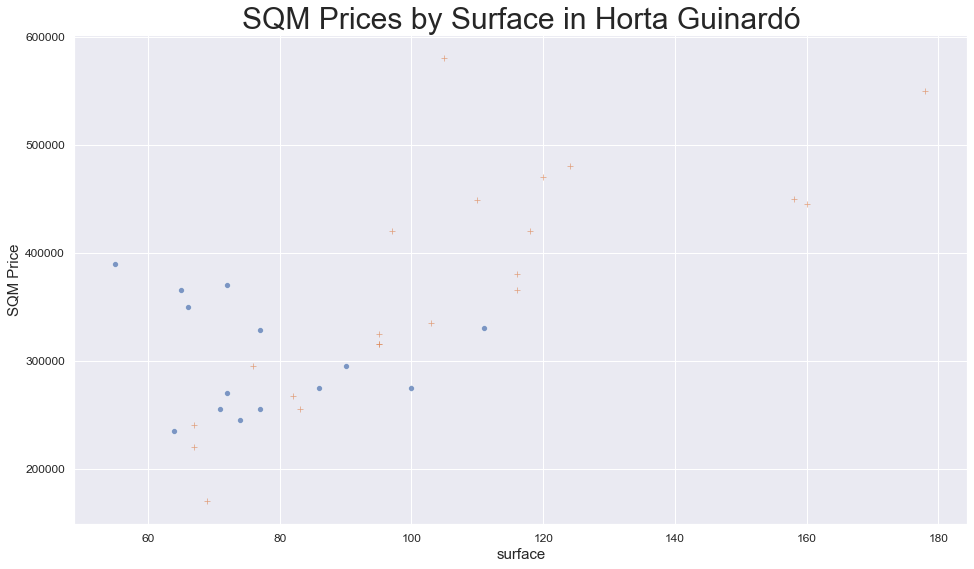

In [24]:
rank = ['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó']

for i in rank:
    plot_scatter_chart(df_prop, i)
    plot_scatter_chart(df_prop_clean, i)
    

# 2.PRICES

## 2.1 SALES PRICES

In [25]:
df_distr = df_prop.groupby('district')['price'].agg([('Mean Price','mean'),('Stand. dev.','std')]).sort_values('Mean Price', ascending=False)
df_distr

,Mean Price,Stand. dev.
district,,
Sarria-Sant_Gervasi,1.943573e+06,1.536283e+06
Eixample,1.027211e+06,7.369125e+05
none,8.892000e+05,1.307236e+06
Gràcia,7.268411e+05,4.568155e+05
Les Corts,7.139608e+05,3.889675e+05
Sant Marti,6.091572e+05,3.885687e+05
Ciutat Vella,5.973263e+05,3.912630e+05
Sants Montjuic,4.847192e+05,2.515802e+05
Horta Guinardó,4.211889e+05,2.022082e+05


In [26]:
rank = ['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó']

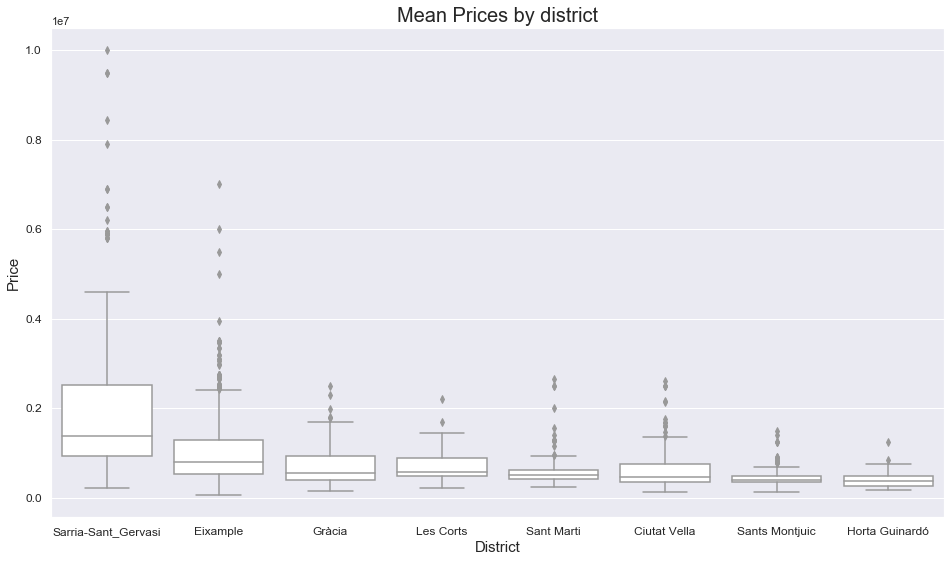

In [27]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="district", y="price", linewidth=1.5, color='white', data=df_prop, order=rank)

ax.axes.set_title("Mean Prices by district",fontsize=20)
ax.set_xlabel("District",fontsize=15)
ax.set_ylabel("Price",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('mean_price.png', dpi=400)

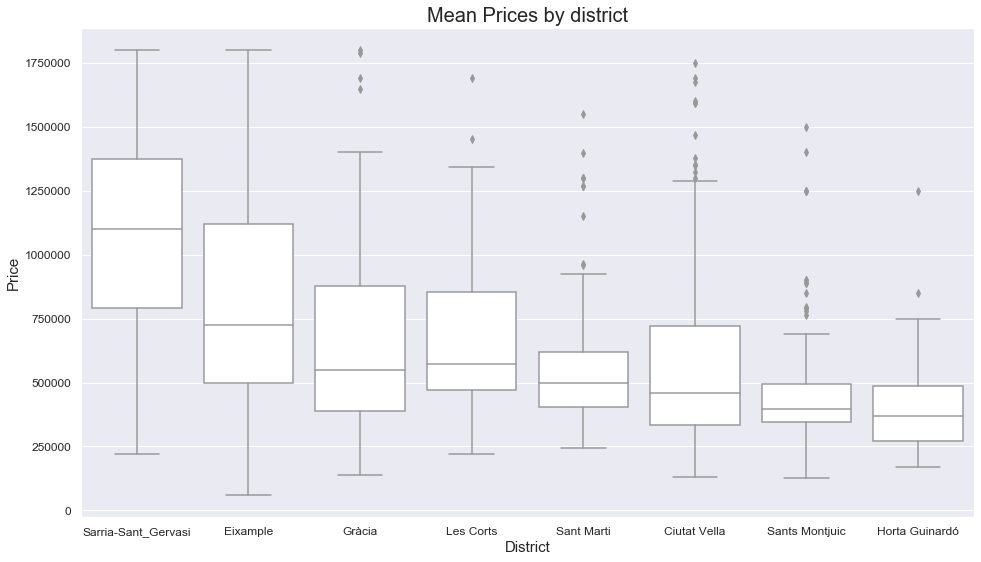

In [28]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="district", y="price", linewidth=1.5, color='white', data=df_prop_clean, order=rank)

ax.axes.set_title("Mean Prices by district",fontsize=20)
ax.set_xlabel("District",fontsize=15)
ax.set_ylabel("Price",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('mean_price2.png', dpi=400)

## 2.2 SALES PRICES BY M2

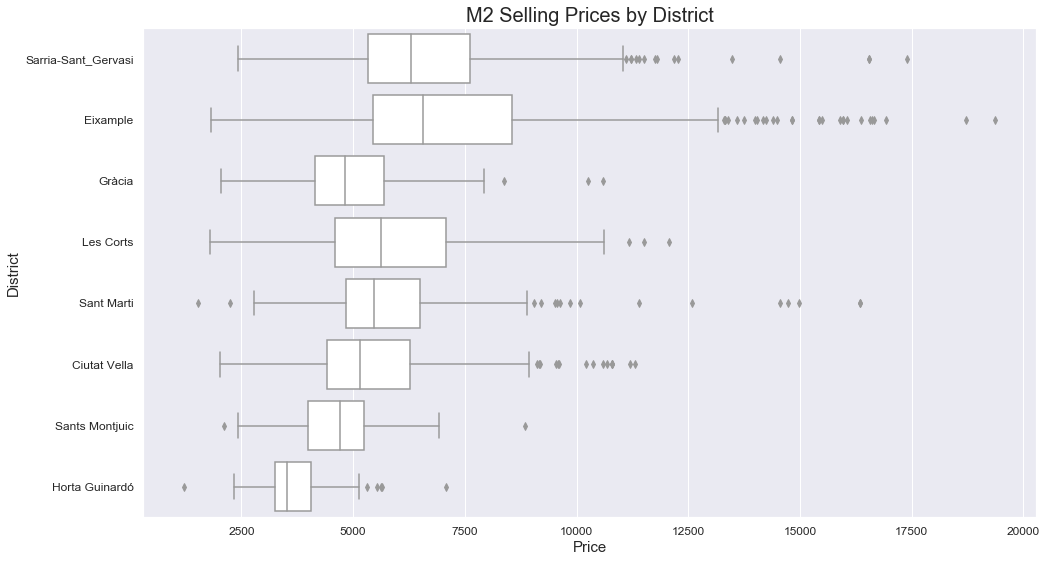

In [29]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="sqm_price", y="district", linewidth=1.5, color='white', data=df_prop,orient="h", order=rank)

ax.axes.set_title("M2 Selling Prices by District",fontsize=20)
ax.set_xlabel("Price",fontsize=15)
ax.set_ylabel("District",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('m2 by district.png', dpi=400)

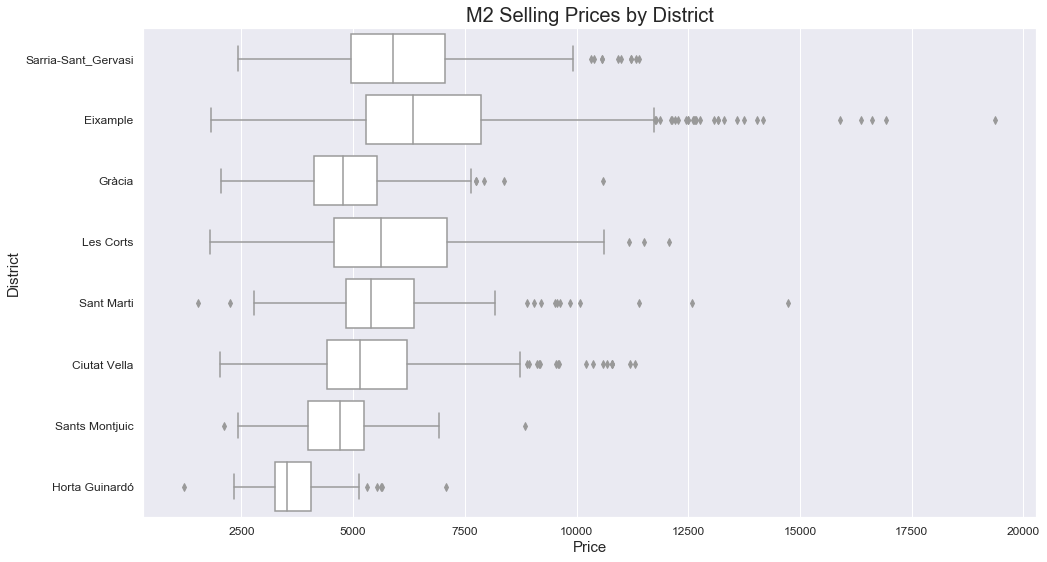

In [30]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="sqm_price", y="district", linewidth=1.5, color='white', data=df_prop_clean, orient="h", order=rank)

ax.axes.set_title("M2 Selling Prices by District",fontsize=20)
ax.set_xlabel("Price",fontsize=15)
ax.set_ylabel("District",fontsize=15)
ax.tick_params(labelsize=12)

# 2.3SURFACE & PRICE

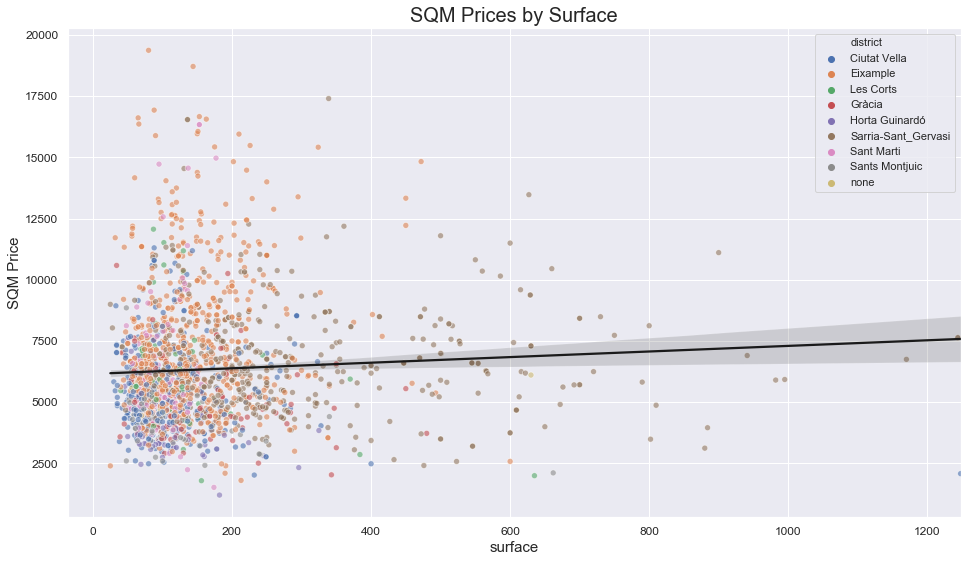

In [31]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(x="sqm_constr", y="sqm_price",hue='district', alpha=0.6, data=df_prop)
ax=sns.regplot('sqm_constr', 'sqm_price', data=df_prop, scatter=False, color=".1")
#ax = sns.lmplot(x="sqm_constr", y="sqm_price", data=df_prop)
ax.axes.set_title("SQM Prices by Surface",fontsize=20)
ax.set_xlabel("surface",fontsize=15)
ax.set_ylabel("SQM Price",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('sqm_price_by_surface.png', dpi=400)

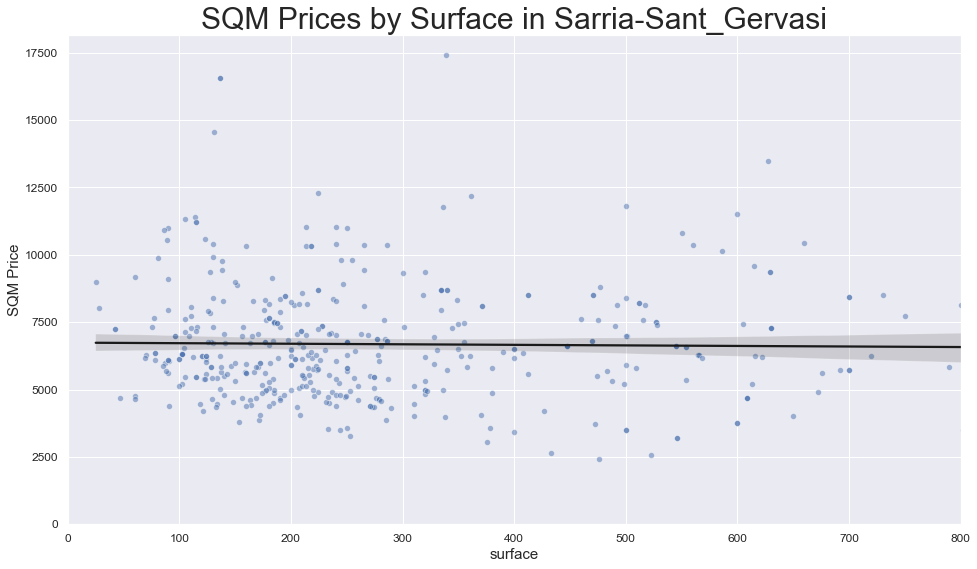

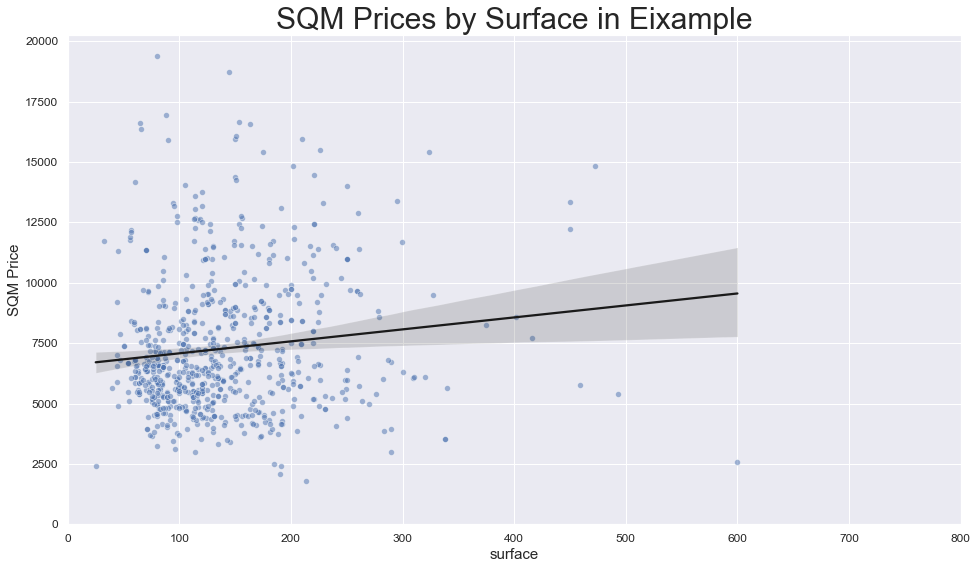

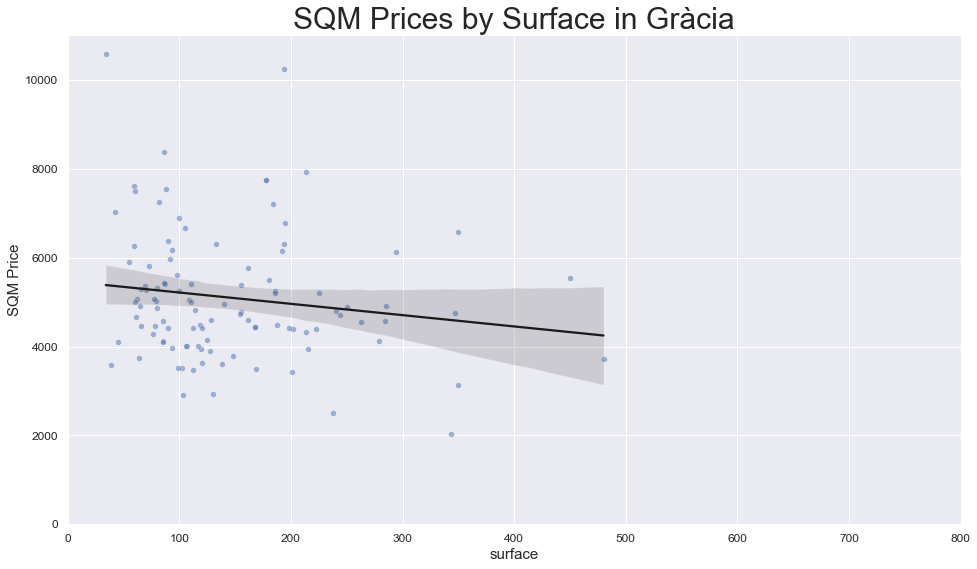

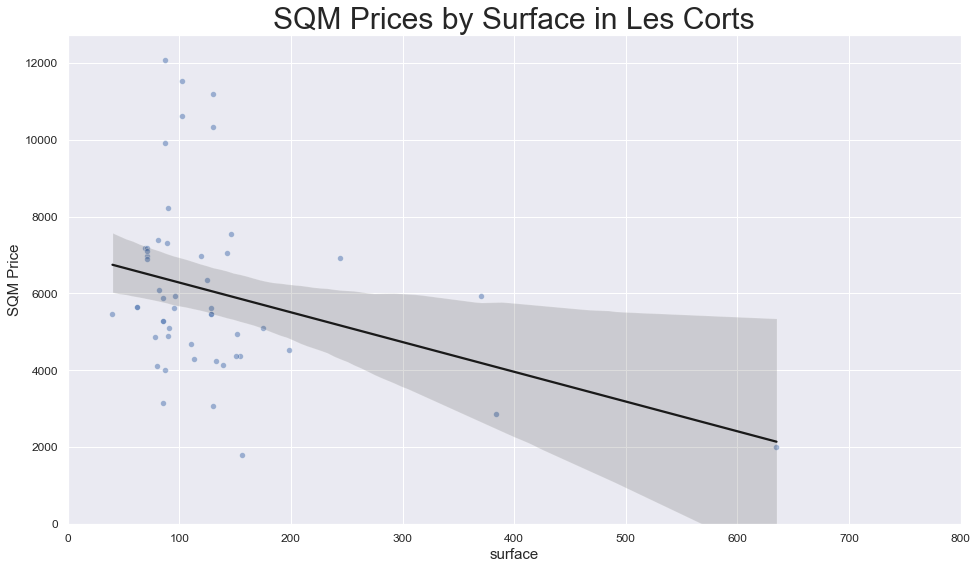

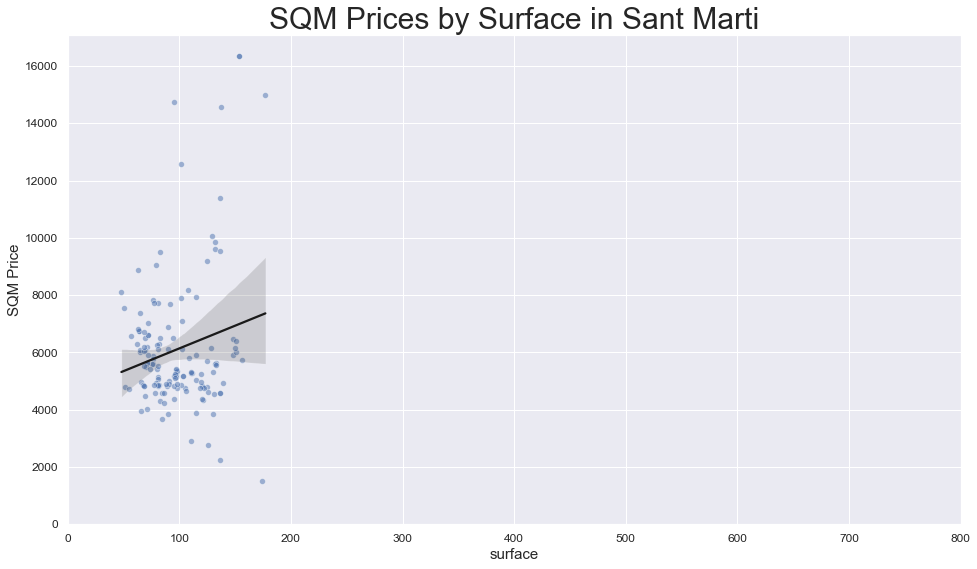

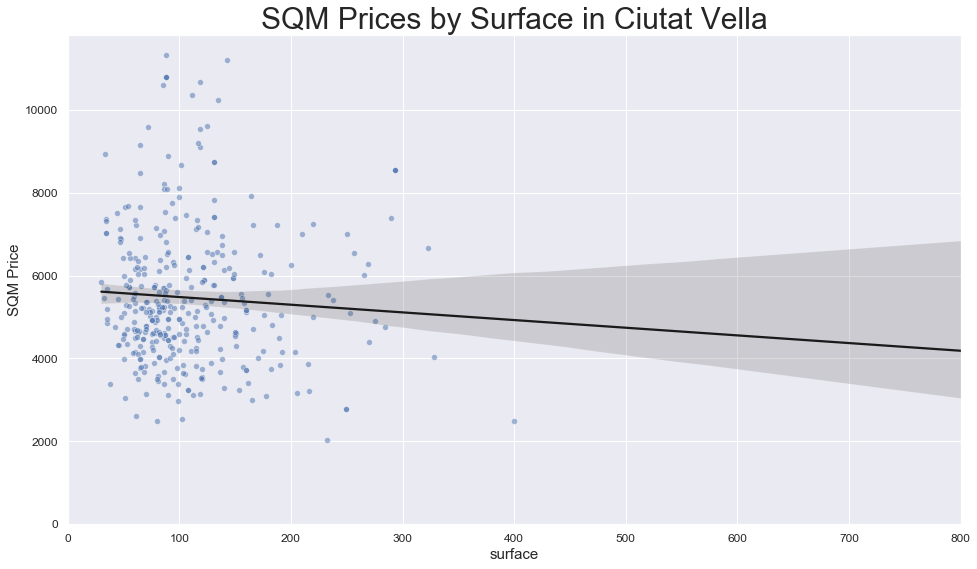

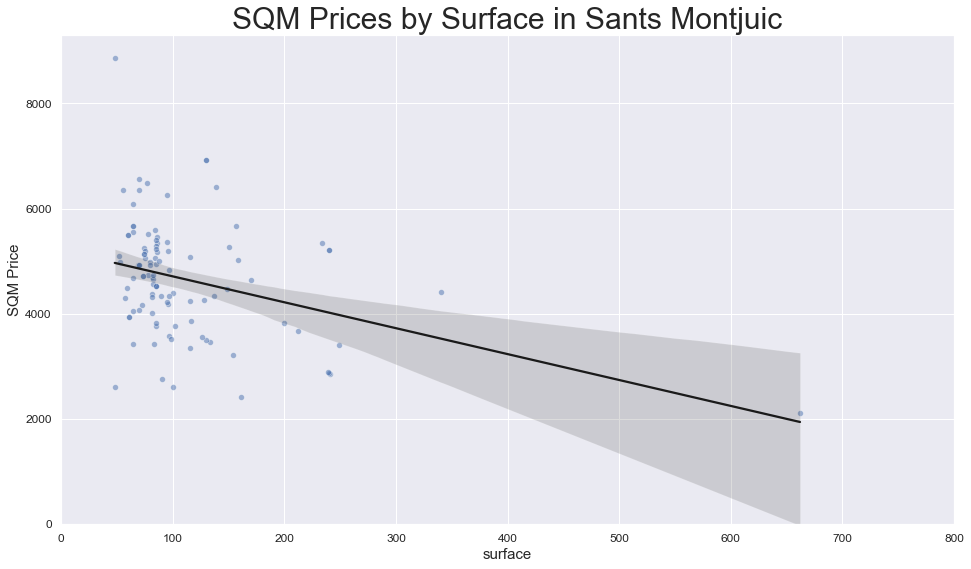

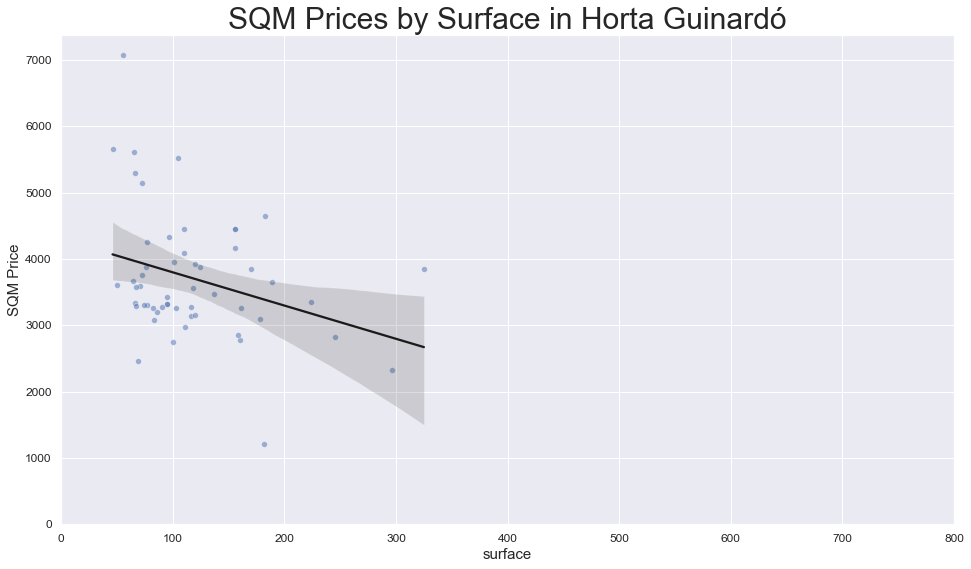

In [32]:
for i in rank:
    #plt.figure(figsize=(12,7))
    #plt.scatter(df.medv, df[i], s=75, c=df["medv"], cmap="BuGn")
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(16,9))
    
    df = df_prop.loc[df_prop.district== i ]
    
    ax = sns.scatterplot(x="sqm_constr", y="sqm_price", alpha=0.50 , data=df)
    ax = sns.regplot('sqm_constr', 'sqm_price', data=df, scatter=False, color=".1")
    
    ax.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=30)
    ax.set_xlabel("surface",fontsize=15)
    ax.set_ylabel("SQM Price",fontsize=15)
    ax.tick_params(labelsize=12)
    
    ax = plt.ylim(0, None)
    ax = plt.xlim(0, 800)
    plt.savefig(f"SQM Prices by Surface in {i}.png", dpi=400)

    
    
    
  

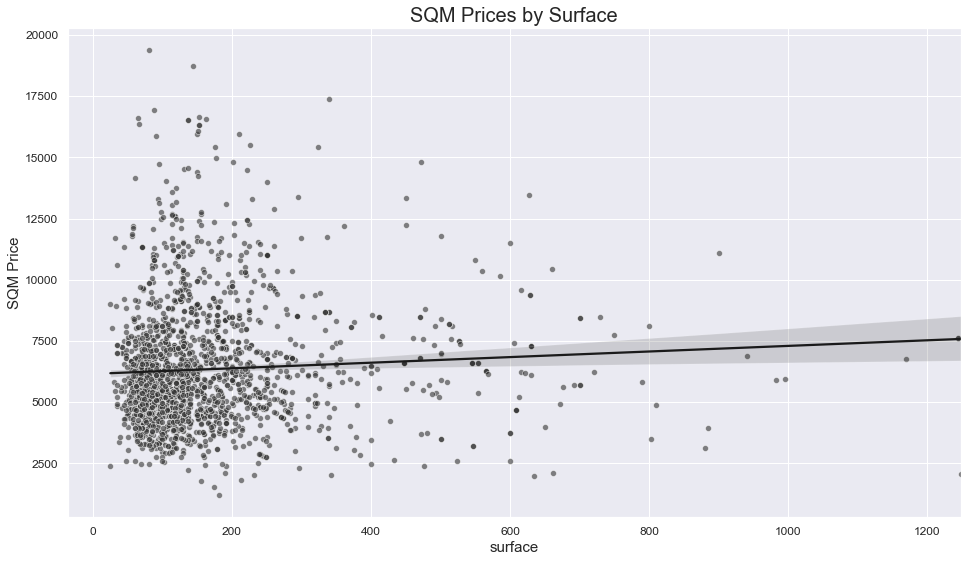

In [33]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(x="sqm_constr", y="sqm_price",color=".2", alpha=0.6, data=df_prop)
ax=sns.regplot('sqm_constr', 'sqm_price', data=df_prop, scatter=False, color=".1")
#ax = sns.lmplot(x="sqm_constr", y="sqm_price", data=df_prop)
ax.axes.set_title("SQM Prices by Surface",fontsize=20)
ax.set_xlabel("surface",fontsize=15)
ax.set_ylabel("SQM Price",fontsize=15)
ax.tick_params(labelsize=12)


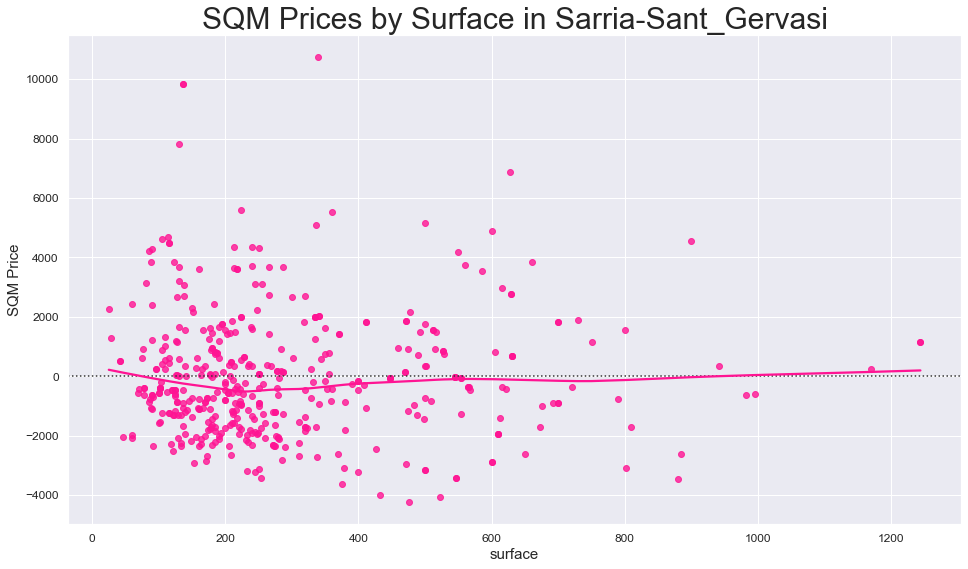

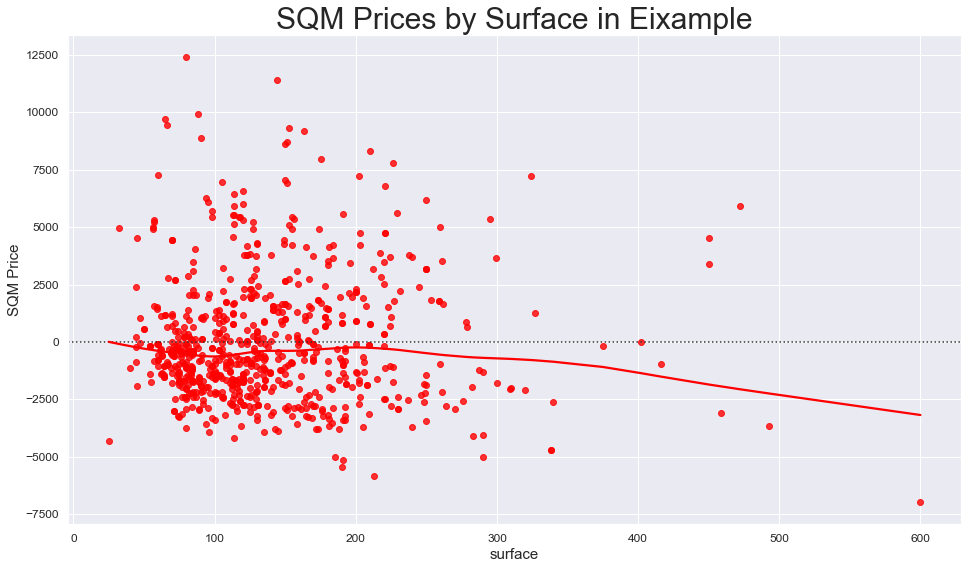

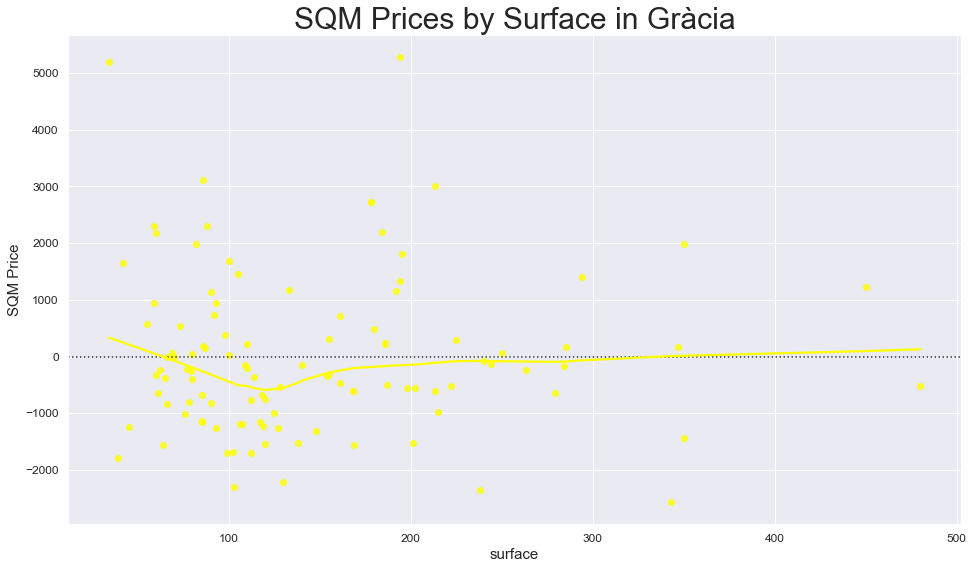

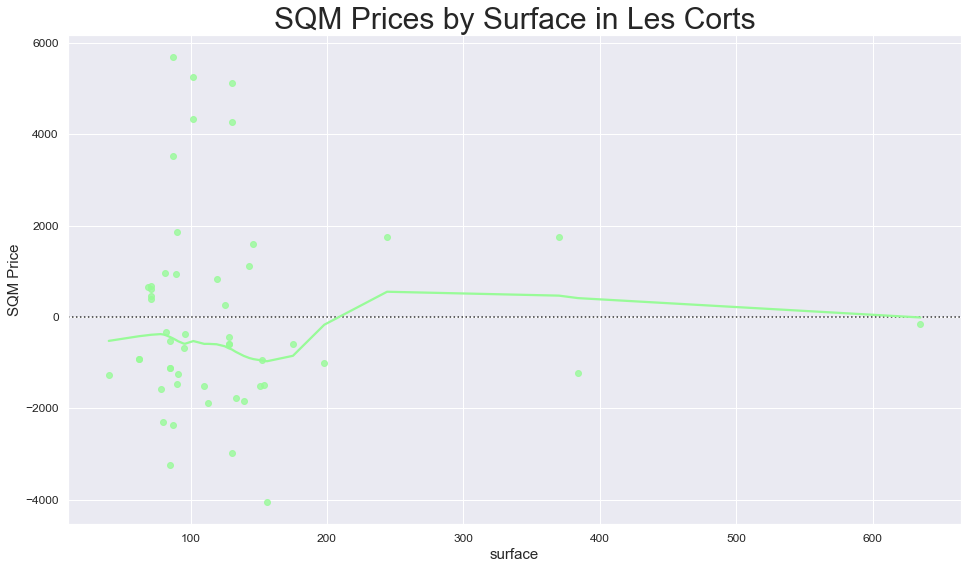

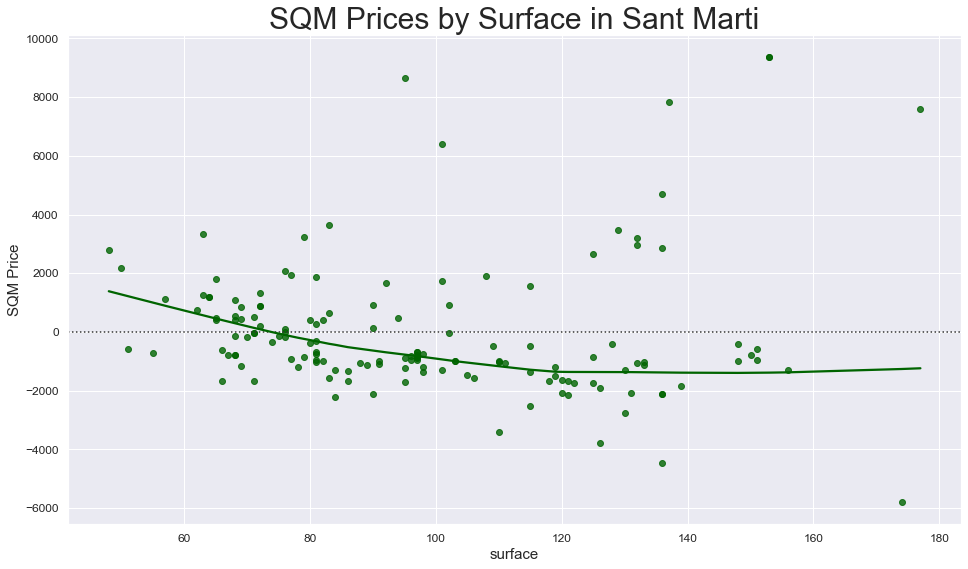

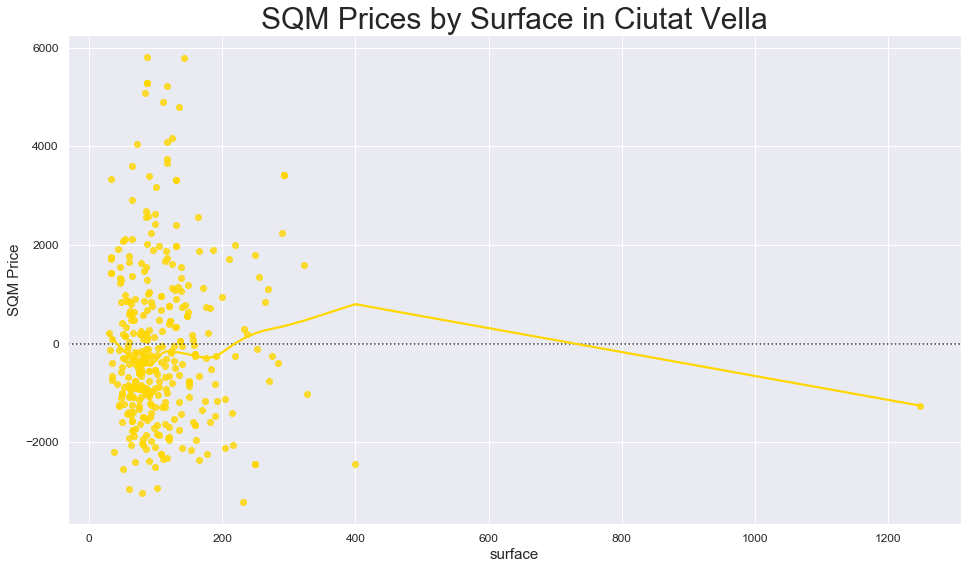

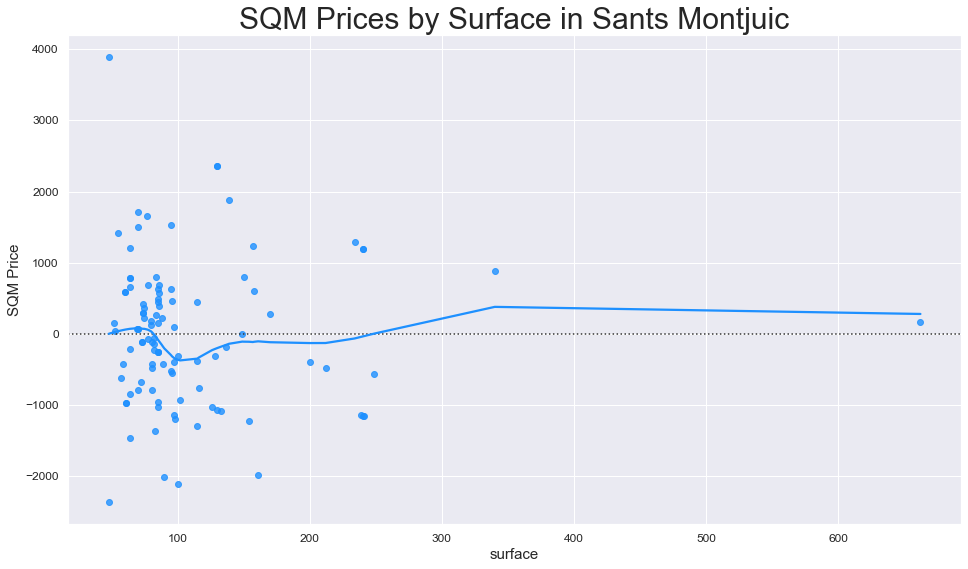

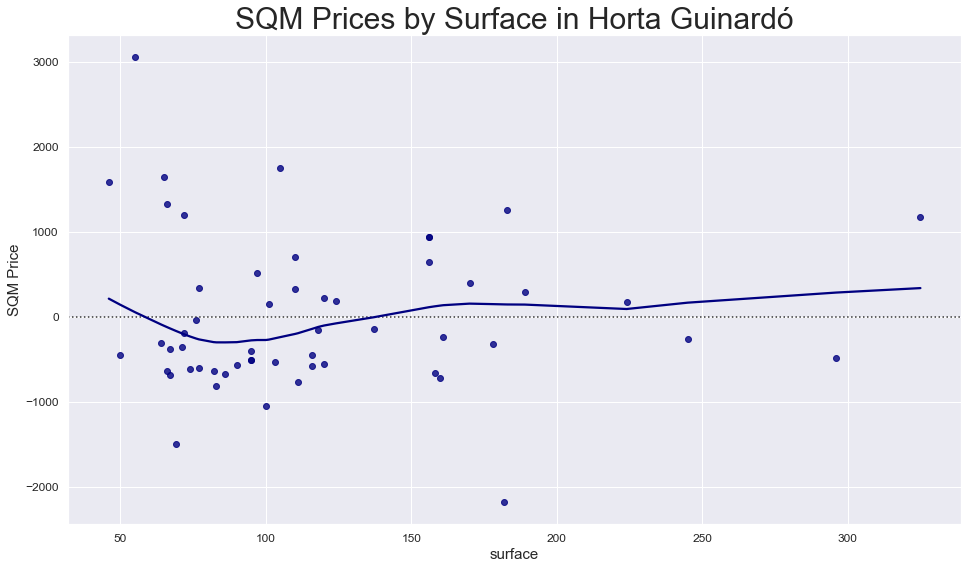

In [34]:
rank = ['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó']
colors = ['deeppink', 'red', 'yellow', 'palegreen', 'darkgreen','gold','dodgerblue','navy']


for i, j in zip(rank, colors):
    df_distr=df_prop.loc[df_prop.district == i]
    fig, ax = plt.subplots(figsize=(16,9))
    ax = sns.residplot('sqm_constr','sqm_price',data=df_distr, lowess=True, color=j)

    ax.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=30)
    ax.set_xlabel("surface",fontsize=15)
    ax.set_ylabel("SQM Price",fontsize=15)
    ax.tick_params(labelsize=12)
    plt.savefig(f"regression SQM Prices by Surface  in {i}.png", dpi=400)

## 2.3 PRICES DISTRIBUTION

No handles with labels found to put in legend.


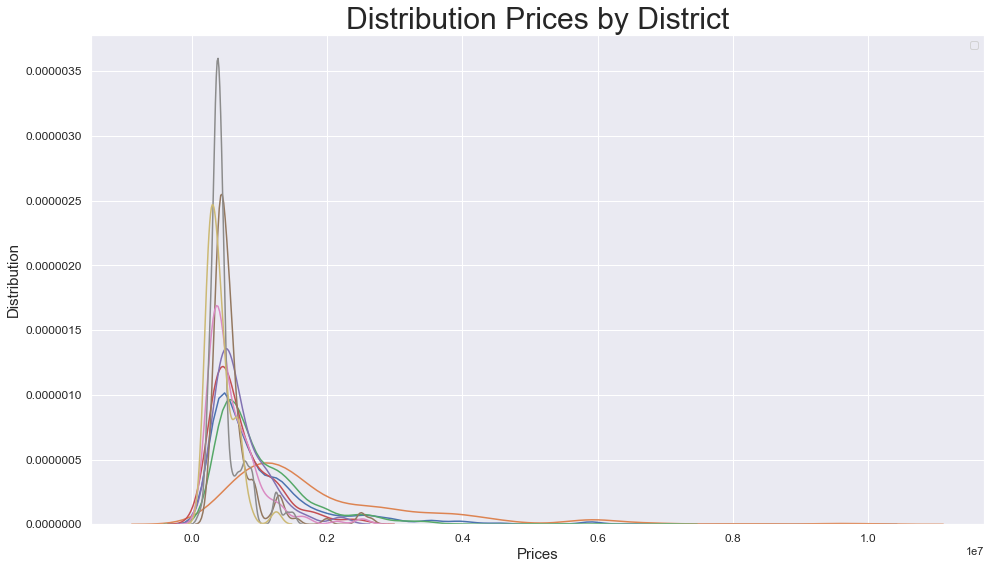

In [35]:
rank = ['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó']
colors = ['deeppink', 'red', 'yellow', 'palegreen', 'darkgreen','gold','dodgerblue','navy']
labels = ['General','Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó']

x = df_prop['price']
x1, x2, x3, x4, x5, x6, x7, x8 = [df_prop.loc[df_prop.district == i]['price'] for i in rank]

fig, ax = plt.subplots(figsize=(16,9))
ax = sns.distplot(x, rug=False, hist=False)
ax = sns.distplot(x1, rug=False, hist=False)
ax = sns.distplot(x2, rug=False, hist=False)
ax = sns.distplot(x3, rug=False, hist=False)
ax = sns.distplot(x4, rug=False, hist=False)
ax = sns.distplot(x5, rug=False, hist=False)
ax = sns.distplot(x6, rug=False, hist=False)
ax = sns.distplot(x7, rug=False, hist=False)
ax = sns.distplot(x8, rug=False, hist=False)

ax.axes.set_title("Distribution Prices by District",fontsize=30)
ax.set_xlabel("Prices",fontsize=15)
ax.set_ylabel("Distribution",fontsize=15)
ax.set_label(labels)
ax.legend()
ax.tick_params(labelsize=12)
plt.savefig(f"distribution_prices_by_district.png", dpi=400)

In [36]:
#v0, v1, v2 = [i**2 for i in range(3)]
x1, x2, x3, x4, x5, x6, x7, x8 = [df_prop.loc[df_prop.district == i]['price'] for i in rank]

## 2.4 3d GRAPH

In [37]:
dict_names = {'Sarria-Sant_Gervasi':'05','Eixample':'02','Gràcia':'06',
              'Les Corts':'04', 'Sant Marti':'10','Ciutat Vella':'01',
              'Sants Montjuic':'03','Horta Guinardó':'07'}

def get_distr(neigh): 
    for key, value in dict_names.items():
        if neigh == key:
            return value 

In [38]:
df_prop['codi_barri'] = df_prop.district.apply(lambda x: get_distr(x))

In [39]:
df_3d = df_prop.dropna()
df_3d.columns

Index(['Unnamed: 0', 'district', 'room_n', 'bath_n', 'renovated', 'sqm_constr',
       'price', 'sqm_price', 'codi_barri'],
      dtype='object')

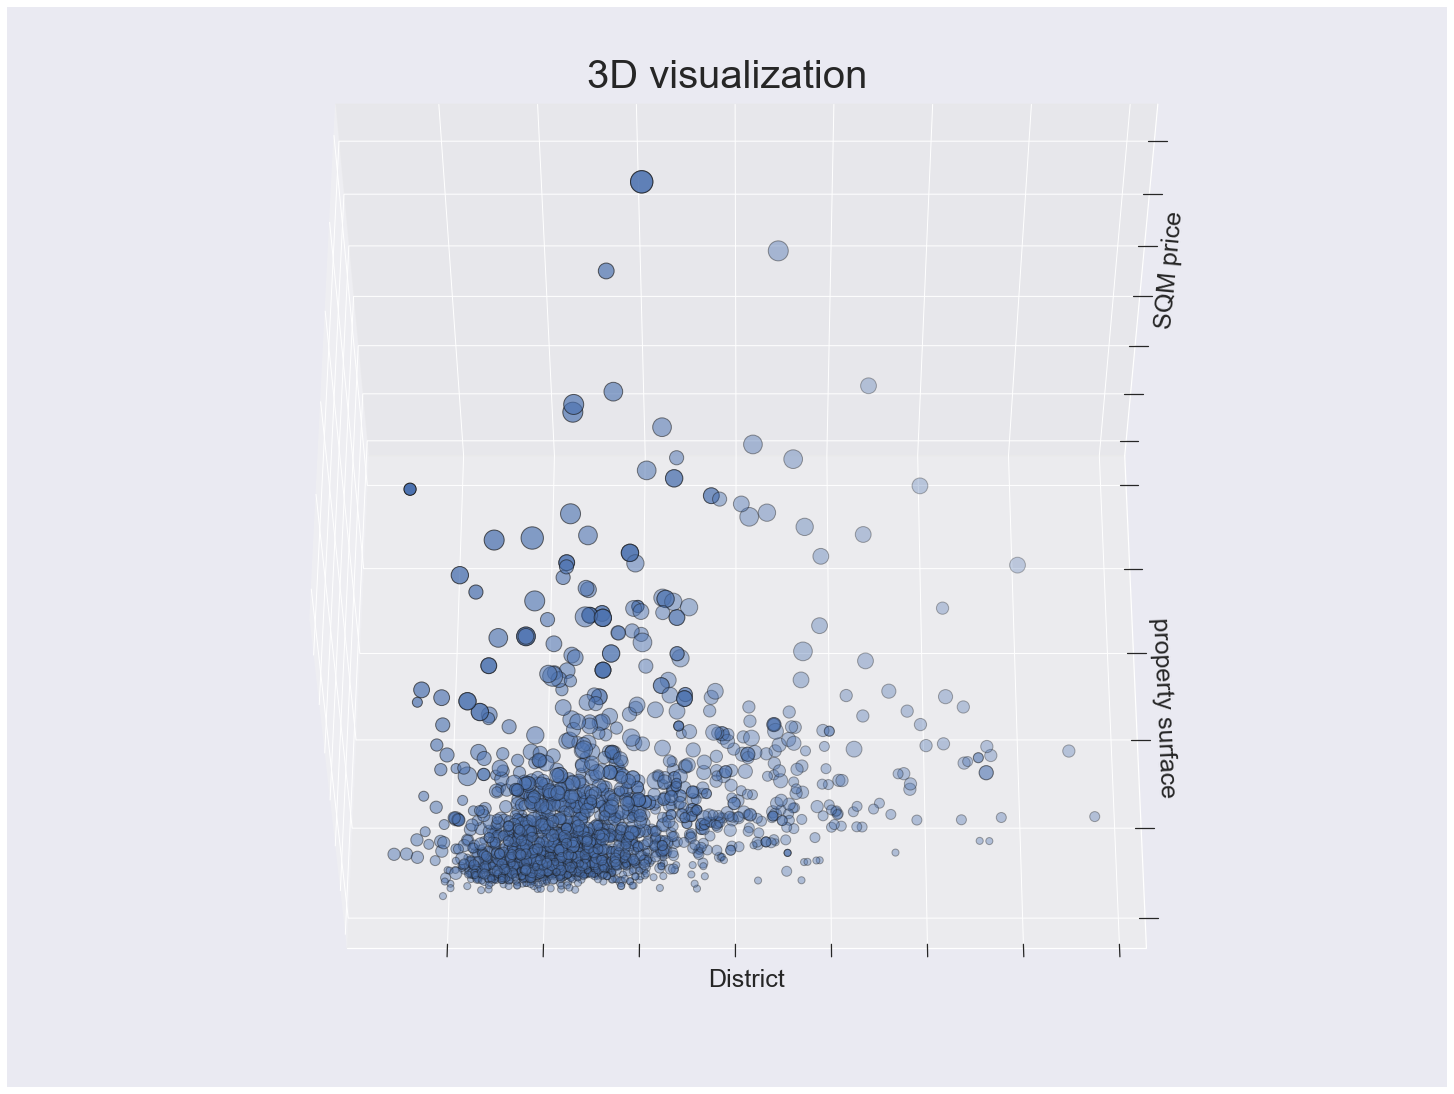

In [47]:
colors = ['deeppink', 'red', 'yellow', 'palegreen', 'darkgreen','gold','dodgerblue','navy']
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=56, azim=-90)
ax.scatter(df_3d.iloc[:, 7], df_3d.iloc[:, 6], df_3d.iloc[:, 5],
           cmap=plt.cm.Set1, edgecolor='k', s = df_3d.iloc[:, 3]*50)

"""for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(features[features['Species']== label][features.columns[0]].mean(),
              features[features['Species'] == label][features.columns[1]].mean(),
              features[features['Species'] == label][features.columns[2]].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)"""

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("District", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("property surface", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("SQM price", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
df_prop.columns

## 3.GEOGRAPHIC VISUAIZATION

In [2]:
import geojson
import folium

In [3]:
with open(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\bcn-geodata\districtes\districtes.geojson') as f:
    geojs = geojson.load(f)

In [4]:
df_distr = df_prop.groupby('district')['sqm_price'].agg([('Mean Price','mean'),('Stand. dev.','std')]).sort_values('Mean Price', ascending=False)


NameError: name 'df_prop' is not defined

In [ ]:
dict_names = {'Sarria-Sant_Gervasi':'05','Eixample':'02','Gràcia':'06',
              'Les Corts':'04', 'Sant Marti':'10','Ciutat Vella':'01',
              'Sants Montjuic':'03','Horta Guinardó':'07'}

def get_distr(neigh): 
    for key, value in dict_names.items():
        if neigh == key:
            return value 

In [ ]:
df_distr.reset_index(inplace=True)

In [ ]:
df_distr['codi_barri'] = df_distr.district.apply(lambda x: get_distr(x))

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df_distr.loc[df_distr['district']!='none']

In [ ]:
m = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=12,
               tiles='Stamen Terrain')
               
m.choropleth(
    geo_data=geojs,
    name='choropleth',
    data=df_distr,
    columns=['codi_barri','Mean Price'],
    key_on="properties.DISTRICTE",
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=' SQM price by district'
)
folium.LayerControl().add_to(m)
m.save('mean_price_by_district.html')
               
#m.save('acc_by_districte.html')

In [1]:
m

NameError: name 'm' is not defined